In [28]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import xmltodict
from collections import OrderedDict

pd.options.display.max_rows = 12

In [29]:
xml_file = '/Users/bhall/Projects/BrewData/data/Beer2k_fixed.xml'
with open(xml_file) as fd:
    doc = xmltodict.parse(fd.read())

In [63]:
recipe_dict = {'Name': '',
               'Version':'',
               'Type': '',
               'Brewer': ''}
recipe_dict = {}
counter = 0
styles = {}

for recipe in doc['RECIPES']['RECIPE']:
    counter += 1
    
    for key in recipe.keys():
        if key == 'HOPS':
            hop_names = ''
            for h_key in recipe[key]['HOP']:
                hop_names = hop_names + ', ' + h_key['NAME'] if hop_names else h_key['NAME']
            recipe_dict['HOPS'] = hop_names
                
        else:
            recipe_dict[key] = recipe[key]
    break
print('There are %d beers in the database'%counter)
recipe_dict

There are 1 beers in the database


{u'ABV': u'4.7 %',
 u'ACTUAL_EFFICIENCY': u'72.0 %',
 u'AGE': u'30.0000000',
 u'AGE_TEMP': u'18.3333333',
 u'ASST_BREWER': None,
 u'BATCH_SIZE': u'23.0000000',
 u'BOIL_SIZE': u'25.8127168',
 u'BOIL_TIME': u'60.0000000',
 u'BREWER': u'Domi',
 u'CALORIES': u'151.6 kcal/12oz',
 u'CARBONATION': u'2.3000000',
 u'CARBONATION_TEMP': u'5.0000000',
 u'CARBONATION_USED': u'Keg with 10.59 PSI',
 u'DATE': u'07 Apr 2014',
 u'DISPLAY_AGE_TEMP': u'18.3 C',
 u'DISPLAY_BATCH_SIZE': u'6.08 gal',
 u'DISPLAY_BOIL_SIZE': u'6.82 gal',
 u'DISPLAY_CARB_TEMP': u'5.0 C',
 u'DISPLAY_FG': u'1.010 SG',
 u'DISPLAY_OG': u'1.046 SG',
 u'DISPLAY_PRIMARY_TEMP': u'19.4 C',
 u'DISPLAY_SECONDARY_TEMP': u'19.4 C',
 u'DISPLAY_TERTIARY_TEMP': u'18.3 C',
 u'EFFICIENCY': u'72.0000000',
 u'EQUIPMENT': OrderedDict([(u'NAME', u'Tout Grain !'),
              (u'VERSION', u'1'),
              (u'BOIL_SIZE', u'25.8127168'),
              (u'BATCH_SIZE', u'23.0000000'),
              (u'TUN_VOLUME', u'30.0000000'),
              (u'T

In [5]:
counter = 0
styles = {}
for recipe in doc['RECIPES']['RECIPE']:
    style = recipe['STYLE']['NAME']
    try:
        styles[style] += 1
    except KeyError:
        styles[style] = 1

styles_df = pd.DataFrame(data=styles.values(), index=styles.keys(), columns=['count'])
styles_df.sort_values(inplace=True, by=['count'], ascending=False)

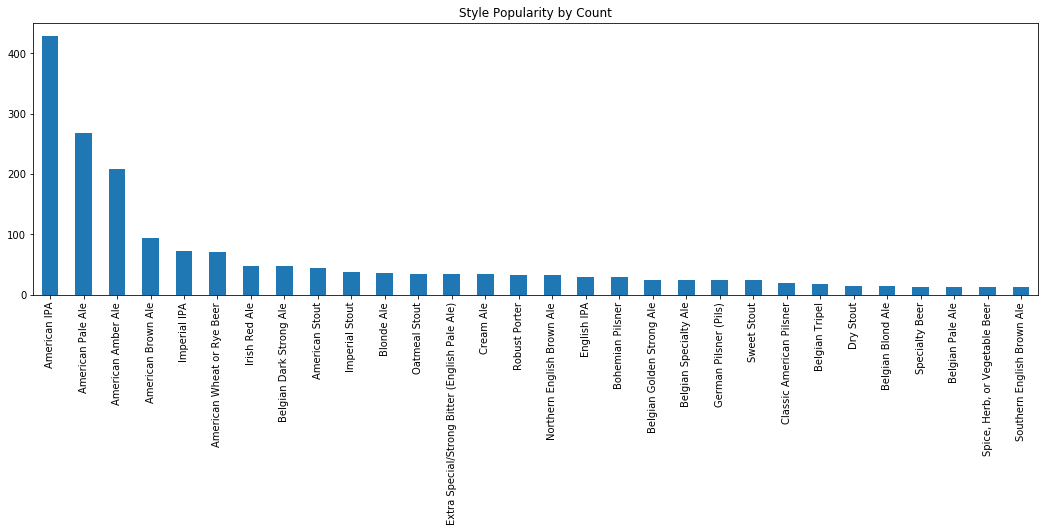

In [6]:
styles_df.ix[:30].plot(kind='bar', figsize=(18, 5), title='Style Popularity by Count', legend=False)
